# Machine Learning

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

# Algorithms 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Perceptron
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
import catboost as ctb
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
data = pd.read_csv('../data/processed/set_data.csv', delimiter=',', index_col=0);
data

,WindSpeed,ActivePower,Estacion,MomentoDia,Año,Sin_WD,Cos_WD,Sin_Yaw,Cos_Yaw
Time,,,,,,,,,
2017-01-01 00:00:00,13.525400,5229.550000,invierno,noche,2017,-0.762231,-0.647305,0.892234,-0.451574
2017-01-01 00:10:00,13.525400,5229.550000,invierno,noche,2017,-0.756976,-0.653443,0.892234,-0.451574
2017-01-01 00:20:00,13.477100,5235.970000,invierno,noche,2017,-0.745878,-0.666083,0.896535,-0.442972
2017-01-01 00:30:00,13.223300,5234.350000,invierno,noche,2017,-0.742299,-0.670068,0.902114,-0.431497
2017-01-01 00:40:00,13.609400,5232.010000,invierno,noche,2017,-0.730008,-0.683438,0.880288,-0.474439
...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,2.680484,-25.521072,otoño,noche,2020,-0.228234,0.973606,-0.213240,0.977000
2020-12-31 23:20:00,2.324961,-24.290187,otoño,noche,2020,-0.420265,0.907401,-0.275359,0.961342
2020-12-31 23:30:00,2.068780,-23.819663,otoño,noche,2020,-0.611876,0.790953,-0.521707,0.853124


In [34]:
data.describe()

,WindSpeed,ActivePower,Año,Sin_WD,Cos_WD,Sin_Yaw,Cos_Yaw
count,414000.000000,414000.000000,414000.000000,414000.000000,414000.000000,414000.000000,414000.000000
mean,9.252860,1918.004115,2018.501865,-0.125309,-0.326738,-0.225352,-0.162525
std,4.697325,2217.721355,1.122368,0.658911,0.665867,0.718858,0.637219
min,0.000000,-2305.490000,2017.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5.707145,168.493013,2017.000000,-0.739748,-0.938899,-0.845467,-0.807946
50%,8.213190,1744.369498,2019.000000,-0.163029,-0.545475,-0.534619,-0.201159
75%,12.613767,4020.871422,2020.000000,0.381086,0.222223,0.470912,0.414121
max,29.761900,5237.710000,2020.000000,1.000000,1.000000,1.000000,1.000000


## Preparación de los datos

### Normalización de los datos

#### Velocidad del viento

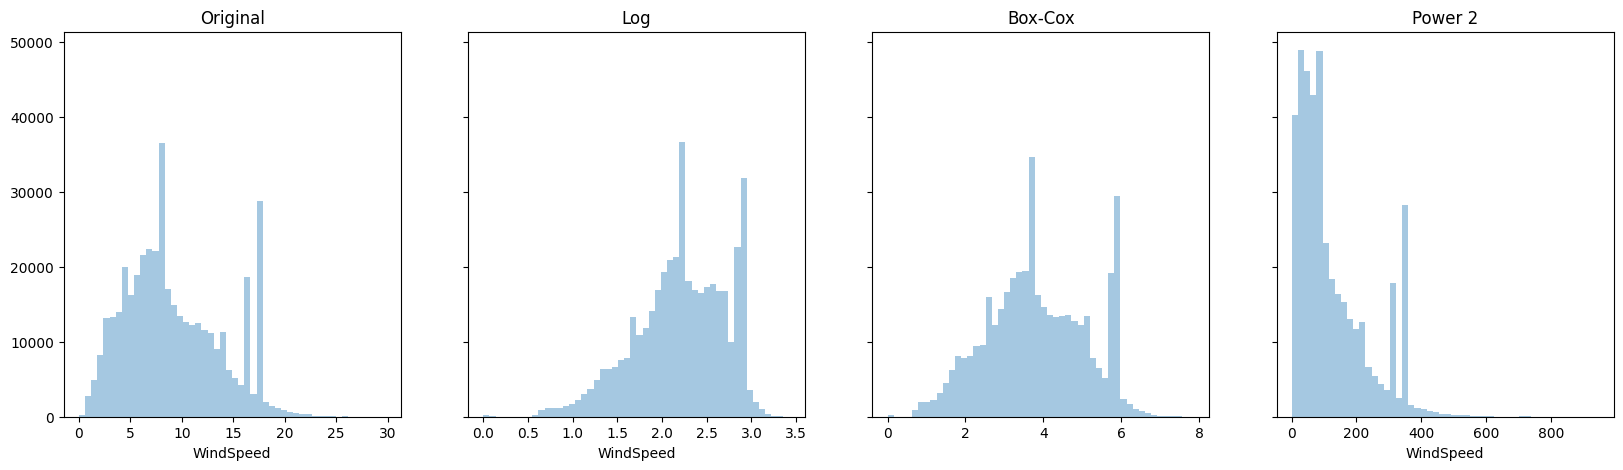

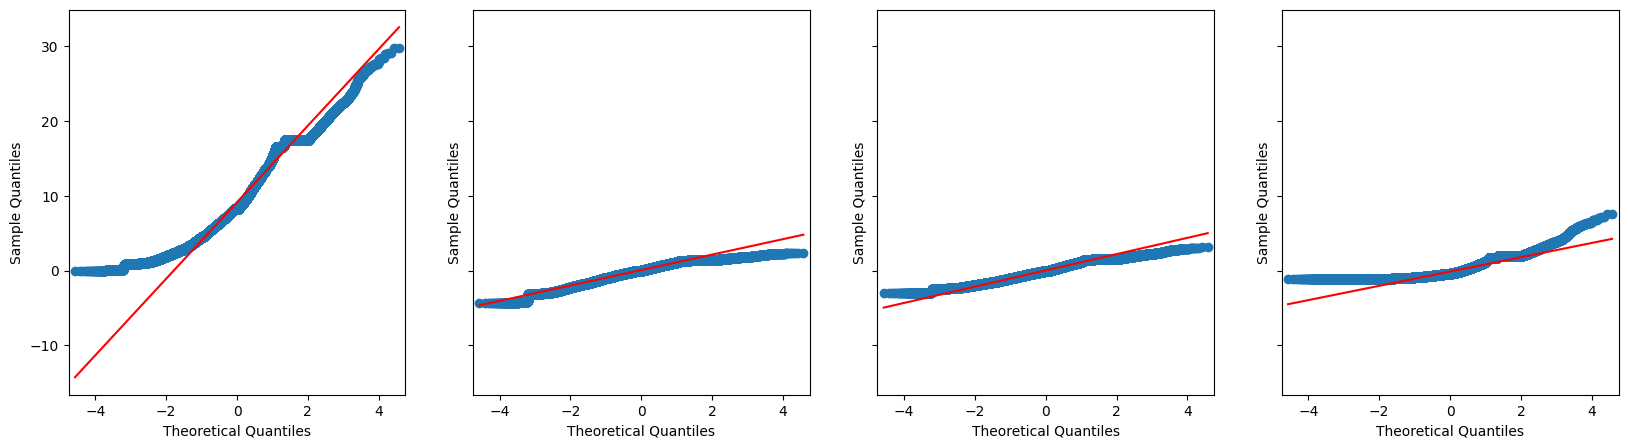

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
# Original target
sns.distplot(data['WindSpeed'], kde=False, ax=axes[0])
axes[0].set_title("Original")
# Logaritmic
sns.distplot(np.log(data['WindSpeed']+1), kde=False, ax=axes[1])
axes[1].set_title("Log")
# Box-cox
sns.distplot(stats.boxcox(data['WindSpeed']+1)[0], kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");
# Power 2
sns.distplot(np.power(data['WindSpeed']+1, 2), kde=False, ax=axes[3])
axes[3].set_title("Power 2");


fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
# Original target
sm.qqplot(data['WindSpeed'], line='q', ax=axes[0]);
# Logaritmic
sm.qqplot(np.log(data['WindSpeed']+1), fit=True, line='q', ax=axes[1]);
# Box-cox
sm.qqplot(stats.boxcox(data['WindSpeed']+1)[0], fit=True, line='q', ax=axes[2]);
# Power 2
sm.qqplot(np.power(data['WindSpeed']+1, 2), fit=True, line='q', ax=axes[3]);

Se utilizará el logaritmo para normalizar la variable.

In [36]:
data['WindSpeed'] = np.log(data['WindSpeed']+1)

### Transformación variables no numéricas

In [37]:
num_estacion = []
for i in data['Estacion']:
    i = (i=='primavera')*0+(i=='verano')*1+(i=='otoño')*2+(i=='inviero')*3
    num_estacion.append(i)
data['Estacion'] = num_estacion

In [38]:
num_momento = []
for i in data['MomentoDia']:
    i = (i=='mañana')*0+(i=='tarde')*1+(i=='noche')*2+(i=='madrugada')*3
    num_momento.append(i)
data['MomentoDia'] = num_momento

## División en train y test

In [39]:
X = data.drop(columns='ActivePower')
y = data['ActivePower']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)
X_train.shape, X_test.shape

((289800, 8), (124200, 8))

## Baseline

### Algoritmos de Regresión

##### Regresión Lineal

In [41]:
### Regresión Lineal ###
lr = LinearRegression()

lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print("Score del modelo (R^2):", round(lr.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.5601
R^2 score: 0.2132
MAE score: 1132.1062
MSE score: 2175423.997
RMSE score: 1474.9319
MAPE score: 893.2605


##### Regresión polinomial

In [42]:
poli_reg = PolynomialFeatures(degree = 4)

X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

model = LinearRegression()

model.fit(X_train_poli, y_train)
preds = model.predict(X_test_poli)

print("Score del modelo (R^2):", round(model.score(X_train_poli, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.7228
R^2 score: 0.712
MAE score: 828.4879
MSE score: 1379434.7517
RMSE score: 1174.4934
MAPE score: 880.1277


##### Regresión Lasso

In [43]:
modelo = Lasso()

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.5601
R^2 score: 0.2103
MAE score: 1132.2846
MSE score: 2175378.2563
RMSE score: 1474.9164
MAPE score: 890.8222


##### Regresión de Ridge

In [44]:
modelo = Ridge()

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.5601
R^2 score: 0.2132
MAE score: 1132.1083
MSE score: 2175423.9685
RMSE score: 1474.9319
MAPE score: 893.2451


### Algoritmos basados en Instancia

<AxesSubplot: >

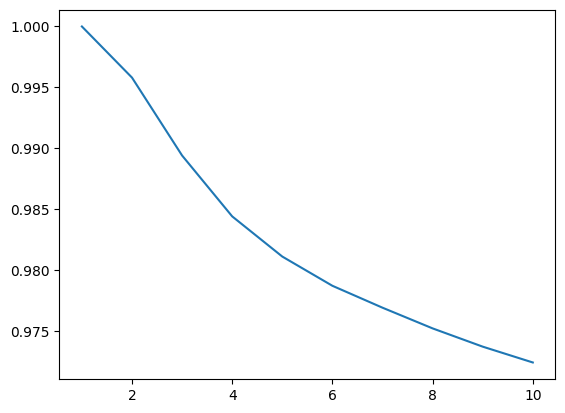

In [45]:
n = [1,2,3,4,5,6,7,8,9,10]
score = []
for i in n:
    modelo = KNeighborsRegressor(n_neighbors=i)
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    score.append(round(modelo.score(X_train, y_train), 4))

sns.lineplot(x=n, y=score)

In [46]:
### k-Nearest Neighbor ###
modelo = KNeighborsRegressor(n_neighbors=4)

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.9844
R^2 score: 0.9702
MAE score: 108.8382
MSE score: 143843.0551
RMSE score: 379.2665
MAPE score: 109.349


### Algoritmos de Árbol de Decisión

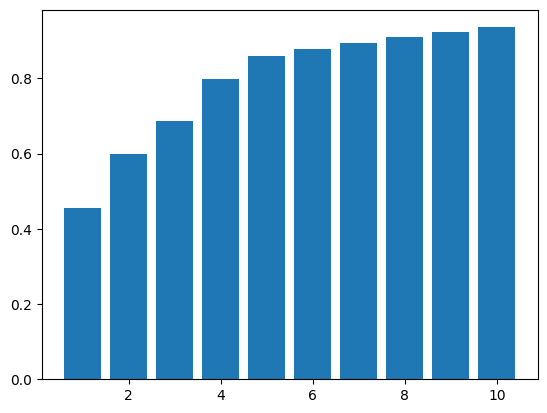

In [47]:
n = [1,2,3,4,5,6,7,8,9,10]
score = []

for i in n:
    modelo = DecisionTreeRegressor(max_depth=i)
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    score.append(round(modelo.score(X_train, y_train), 4))
    
plt.bar(n, score)
plt.show()

In [48]:
### Árbol de decisión ###
modelo = DecisionTreeRegressor(max_depth=4)

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.7989
R^2 score: 0.75
MAE score: 564.5284
MSE score: 986454.3823
RMSE score: 993.2041
MAPE score: 435.7972


### Algoritmos de Ensembled

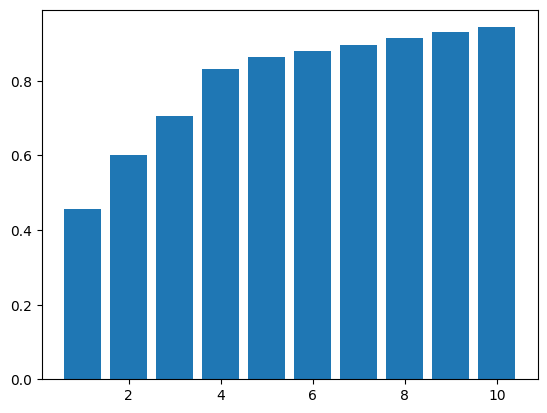

In [49]:
n = [1,2,3,4,5,6,7,8,9,10]
score = []

for i in n:
    modelo = RandomForestRegressor(n_estimators=120, max_depth=i)
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    score.append(round(modelo.score(X_train, y_train), 4))
    
plt.bar(n, score)
plt.show()

In [50]:
### Random Forest ###
modelo = RandomForestRegressor(n_estimators=120, max_depth=3)

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.7039
R^2 score: 0.5594
MAE score: 830.4134
MSE score: 1450373.8959
RMSE score: 1204.3147
MAPE score: 529.5709


### LightGBM

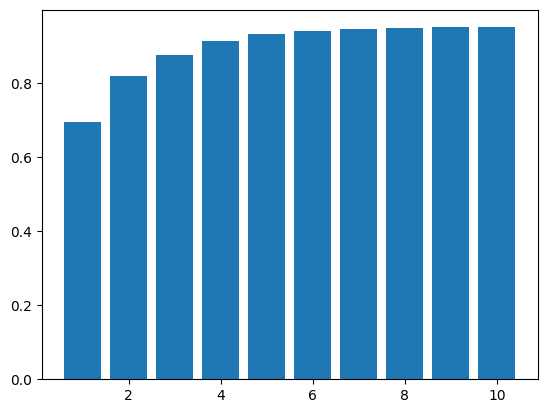

In [51]:
n = [1,2,3,4,5,6,7,8,9,10]
score = []

for i in n:
    modelo = lgb.LGBMRegressor(n_estimators=120, max_depth=i)
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    score.append(round(modelo.score(X_train, y_train), 4))
    
plt.bar(n, score)
plt.show()

In [52]:
modelo = lgb.LGBMRegressor(n_estimators=120, max_depth=2)

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.8188
R^2 score: 0.7564
MAE score: 521.9634
MSE score: 888559.7573
RMSE score: 942.6345
MAPE score: 464.6599


### Algoritmos de Boosting

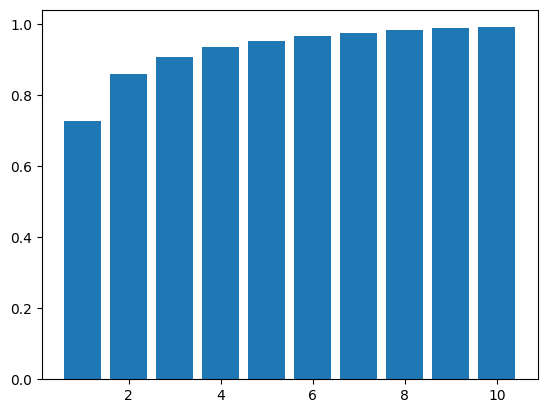

In [53]:
n = [1,2,3,4,5,6,7,8,9,10]
score = []

for i in n:
    modelo = xgb.XGBRegressor(n_estimators=120, max_depth=i)
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    score.append(round(modelo.score(X_train, y_train), 4))
    
plt.bar(n, score)
plt.show()

In [54]:
# XGBoost
modelo = xgb.XGBRegressor(n_estimators=120, max_depth=2)

modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

print("Score del modelo (R^2):", round(modelo.score(X_train, y_train), 4))
print("R^2 score:", round(r2_score(preds, y_test), 4))
print("MAE score:", round(mean_absolute_error(preds, y_test), 4))
print("MSE score:", round(mean_squared_error(preds, y_test), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error(preds, y_test)), 4))

def mean_absolute_percentage_error(y_pred, y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


print("MAPE score:", round(mean_absolute_percentage_error(preds, y_test), 4))

Score del modelo (R^2): 0.8604
R^2 score: 0.8298
MAE score: 437.3761
MSE score: 686399.8337
RMSE score: 828.4925
MAPE score: 467.8918
